# Overlap with other tools

## Benchmark comparison BUSCO vs fDOG-Assembly

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
#tools = ['busco_metazoa_augustus', 'busco_metazoa_metaeuk', 'fdog_assembly_metazoa_augustus_galga_v2','fdog_assembly_metazoa_augustus', 'fdog_assembly_metazoa_augustus_fly', 'fdog_assembly_metazoa_metaeuk', 'fdog_assembly_metazoa_sens_metaeuk']
#tools = ['busco_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'busco_metazoa_augustus', 'busco_metazoa_metaeuk','fdog_assembly_metazoa_augustus', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
tools = ['busco_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
path = '../../results/qfo_input/'

In [3]:
def create_set_of_sets(path):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = frozenset(line.split('\t'))
        pairs_set.add(pairs)
    #print(len(lines))
    print(len(pairs_set))
    return pairs_set

In [4]:
list_of_sets_ref = []
dict_of_sets = {}
nr_orthologs_ref = []
for i in tools_ref:
    pairs_set = create_set_of_sets(path + i + '.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set
    nr_orthologs_ref.append(len(pairs_set))

8738
8945
8168
8422
8487
8979
7973
8616
9372
9006
8906
8606
9126


In [5]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
5669


In [6]:
list_of_sets = []
for t in tools:
    print(t)
    pairs_set = create_set_of_sets(path + t + '.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

busco_metazoa_augustus_gallus_v2
8567
busco_metazoa_metaeuk_gallus_v2
8621
fdog_assembly_metazoa_augustus_gallus_v2
8321
fdog_assembly_metazoa_metaeuk_gallus_v2
8188


In [7]:
sensitivity_tools = []
nr_orthologs_tools = []
for i in range(len(tools)):
    print(tools[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    print(intersection_size)
    print(intersection_size/len(intersection_all))
    sensitivity_tools.append(intersection_size/len(intersection_all))
    nr_orthologs_tools.append(len(list_of_sets[i]))

busco_metazoa_augustus_gallus_v2
5304
0.9356147468689363
busco_metazoa_metaeuk_gallus_v2
5402
0.9529017463397425
fdog_assembly_metazoa_augustus_gallus_v2
5352
0.9440818486505557
fdog_assembly_metazoa_metaeuk_gallus_v2
5182
0.9140941965073205


In [8]:
# Investigate pairs found exclusively by BUSCO or fDOG-Assembly Augustus
intersection_busco_aug = list_of_sets[0].intersection(intersection_all)
intersection_fdog_ass_aug = list_of_sets[2].intersection(intersection_all)
#print(intersection_busco_aug - intersection_fdog_ass_aug)
print(len(intersection_busco_aug - intersection_fdog_ass_aug))
print(len(intersection_fdog_ass_aug - intersection_busco_aug))

213
261


In [9]:
# Investigate pairs found exclusively by BUSCO MetaEuk or fDOG-Assembly MetaEuk
intersection_busco_meta = list_of_sets[1].intersection(intersection_all)
intersection_fdog_ass_meta = list_of_sets[3].intersection(intersection_all)
#print(intersection_busco_meta - intersection_fdog_ass_meta)
print(len(intersection_busco_meta - intersection_fdog_ass_meta))
print(len(intersection_fdog_ass_meta - intersection_busco_meta))

290
70


In [10]:
# Invetsigate genes that were not found by booth augustus
missing_busco_aug = intersection_all - list_of_sets[0]
missing_fdog_ass_aug = intersection_all - list_of_sets[2]
print(len(missing_busco_aug))
print(len(missing_fdog_ass_aug))
print(missing_busco_aug.intersection(missing_fdog_ass_aug))
print(len(missing_busco_aug.intersection(missing_fdog_ass_aug)))

missed_augustus = missing_busco_aug.intersection(missing_fdog_ass_aug)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_augustus_tools.tsv", 'w') as out:
    for i in missed_augustus:
        a,b = i
        out.write(a + "\t" + b + "\n")

365
317
{frozenset({'Q15050', 'Q8I937'}), frozenset({'A7RST4', 'Q8TDD1'}), frozenset({'A0A1D5PIV6', 'O75800'}), frozenset({'T1FM85', 'P49366'}), frozenset({'Q5ZI25', 'A0AVI4'}), frozenset({'Q9H0E2', 'Q5ZK05'}), frozenset({'T1FMQ8', 'Q9BW27'}), frozenset({'P62851', 'F1NU56'}), frozenset({'P56282', 'T1FST1'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'T1FXS2', 'Q9Y2R4'}), frozenset({'Q9H446', 'O18131'}), frozenset({'Q8WSL9', 'Q9Y673'}), frozenset({'O95777', 'A7RIQ2'}), frozenset({'Q330K2', 'D3ZN43'}), frozenset({'Q13601', 'O16311'}), frozenset({'O61900', 'Q9NXG2'}), frozenset({'A0A8M2BDM9', 'Q13795'}), frozenset({'Q9Y3B2', 'Q9VKJ4'}), frozenset({'O17606', 'Q9HB07'}), frozenset({'B5DFS9', 'P82912'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'Q5ZKK4', 'Q14696'}), frozenset({'Q8K4F7', 'Q96C86'}), frozenset({'Q8NFJ9', 'Q9NEZ7'}), frozenset({'T1FMA3', 'Q9H5U6'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'O95707', 'Q9XVT1'}), frozenset({'Q966M5', 'Q9BU

In [11]:
# Invetsigate genes that were not found by booth metaeuk
missing_busco_meta = intersection_all - list_of_sets[1]
missing_fdog_ass_meta = intersection_all - list_of_sets[3]
print(len(missing_busco_meta))
print(len(missing_fdog_ass_meta))
print(missing_busco_aug.intersection(missing_fdog_ass_meta))
print(len(missing_busco_aug.intersection(missing_fdog_ass_meta)))

missed_metaeuk = missing_busco_meta.intersection(missing_fdog_ass_meta)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_metaeuk_tools.tsv", 'w') as out:
    for i in missed_metaeuk:
        a,b = i
        out.write(a + "\t" + b + "\n")

267
487
{frozenset({'A7RST4', 'Q8TDD1'}), frozenset({'A0A1D5PIV6', 'O75800'}), frozenset({'Q5ZI25', 'A0AVI4'}), frozenset({'O02327', 'Q96GA3'}), frozenset({'Q9H0E2', 'Q5ZK05'}), frozenset({'T1FMQ8', 'Q9BW27'}), frozenset({'A7SK77', 'Q06136'}), frozenset({'P62851', 'F1NU56'}), frozenset({'Q13347', 'B0BNA7'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'Q9H446', 'O18131'}), frozenset({'Q53GS9', 'Q9VWP1'}), frozenset({'Q330K2', 'D3ZN43'}), frozenset({'O61900', 'Q9NXG2'}), frozenset({'Q6AYT3', 'Q9Y3I0'}), frozenset({'A0A8M2BDM9', 'Q13795'}), frozenset({'A0A8I5ZWZ6', 'Q9UKD2'}), frozenset({'Q5ZKK4', 'Q14696'}), frozenset({'Q8K4F7', 'Q96C86'}), frozenset({'Q19264', 'Q9Y315'}), frozenset({'P51946', 'A0A7R9SUL6'}), frozenset({'O95707', 'Q9XVT1'}), frozenset({'Q966M5', 'Q9BUE0'}), frozenset({'Q9P055', 'G5EBX4'}), frozenset({'O75937', 'Q95Y44'}), frozenset({'Q8VHM6', 'O75575'}), frozenset({'Q5ZMG1', 'O94874'}), frozenset({'T1FUL4', 'O15091'}), frozenset({'P62718', 'Q02543'}), frozenset({'Q19906

In [12]:
# Invetsigate genes that were not found by all assembly_based runs
missed_all = missed_augustus.intersection(missed_metaeuk)
print(len(missed_all))
with open("exclusive_gene_lists/exclusive_protein_based_pairs_all.tsv", 'w') as out:
    for i in missed_all:
        a,b = i
        out.write(a + "\t" + b + "\n")

46


In [13]:
sensitivity_ref = []
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))
    sensitivity_ref.append(intersection_size/len(intersection_all_others))

bbh
5669
5683
0.9975365124054196
domainoid
5669
5669
1.0
ensamble
5669
6442
0.8800062092517852
hieranoid
5669
5728
0.989699720670391
inparanoid
5669
5677
0.9985908050026422
metaphors
5669
6035
0.9393537696768849
oma_pairs
5669
5957
0.9516535168709082
orthoffgc
5669
5841
0.97055298750214
orthofinder
5669
5686
0.9970102004924376
orthoinspector
5669
5676
0.9987667371388301
panther
5669
5791
0.9789328268002072
rsd
5669
5815
0.9748925193465177
sonicparanoid
5669
5671
0.9996473285134897


In [14]:
# some statistical stuff
#Standartabweichung
std_dev = np.std(sensitivity_ref)
print(std_dev)

0.033324602818674526


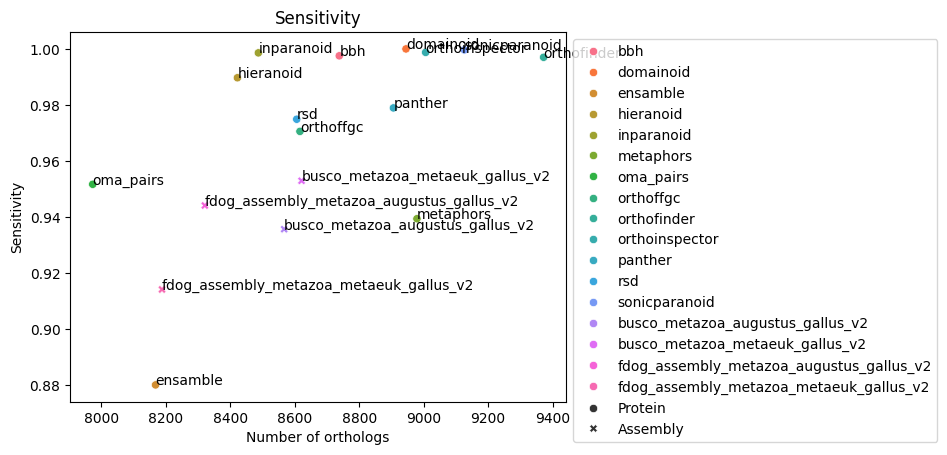

In [15]:
# Plot sensitivity 
tools_list = tools_ref + tools
sensitivity_list = sensitivity_ref + sensitivity_tools
base = []
nr_orthologs_list = nr_orthologs_ref + nr_orthologs_tools
for t in tools_list:
    if t in tools_ref:
        base.append('Protein')
    else:
        base.append('Assembly')
sensitivity_dict = {'tool': tools_list, 'sensitivity': sensitivity_list, 'nr_orthologs': nr_orthologs_list, 'base': base} 
sensitivity_df = pd.DataFrame(sensitivity_dict)
plt = sb.scatterplot(data=sensitivity_df, x="nr_orthologs", y="sensitivity", hue=tools_list, style=base)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

plt.set_title('Sensitivity')
#Set x-axis label
plt.set_xlabel('Number of orthologs')
#Set y-axis label
plt.set_ylabel('Sensitivity')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.02, point['y'], str(point['val']))

label_point(sensitivity_df.nr_orthologs, sensitivity_df.sensitivity, sensitivity_df.tool, plt.figure.gca())
plt.figure.savefig("Sensitivity_all_tools.svg", bbox_inches='tight')

In [47]:
#backup 06.05.24
315
342
#{frozenset({'A0A8J8XD13', 'Q99437'}), frozenset({'Q9NXG2', 'Q5M943'}), frozenset({'Q8IRE4', 'Q32P41'}), frozenset({'Q9VKJ4', 'Q9Y3B2'}), frozenset({'Q5M808', 'Q53FT3'}), frozenset({'A0A1D5PIR3', 'Q12768'}), frozenset({'Q9BTX3', 'A0A1D5PL82'}), frozenset({'F1NK93', 'Q9UJX4'}), frozenset({'P62851', 'F1NU56'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'A0A8I6AE58', 'Q9GZN1'}), frozenset({'P51398', 'A7S9T5'}), frozenset({'Q99471', 'A7RUT5'}), frozenset({'T1FXS2', 'Q9Y2R4'}), frozenset({'Q19987', 'Q9BPX7'}), frozenset({'P51398', 'A0A0G2K264'}), frozenset({'Q9NZ43', 'Q9N598'}), frozenset({'A0A1D5PB45', 'Q969S3'}), frozenset({'A7RL51', 'O94923'}), frozenset({'Q99442', 'B2GUQ9'}), frozenset({'A0A1D5PWD8', 'P11182'}), frozenset({'P38024', 'P22234'}), frozenset({'Q6DHR8', 'Q96E22'}), frozenset({'Q9NQ89', 'A0A1D6UPU0'}), frozenset({'Q9BUE0', 'Q966M5'}), frozenset({'T1ECZ7', 'O95777'}), frozenset({'Q5ZKK4', 'Q14696'}), frozenset({'A0A1D5NWZ8', 'P52435'}), frozenset({'Q9V3T9', 'P22570'}), frozenset({'Q688Z3', 'Q8TDD1'}), frozenset({'F1NTL3', 'Q6AI08'}), frozenset({'A0A1L1RMC0', 'P25786'}), frozenset({'T1FUL4', 'O15091'}), frozenset({'Q9NXG2', 'O61900'}), frozenset({'P62314', 'B2RZB7'}), frozenset({'A0A0G2JWN4', 'Q5BKX5'}), frozenset({'Q53HI1', 'Q10045'}), frozenset({'Q92685', 'F1P0T5'}), frozenset({'B3DLX5', 'Q8N6T3'}), frozenset({'A0A3Q2TXQ2', 'Q9UBZ9'}), frozenset({'Q9BSU1', 'Q5ZKM4'}), frozenset({'Q9VMQ7', 'F1M086'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'O94817', 'Q9VTU1'}), frozenset({'P61313', 'F1NQG5'}), frozenset({'Q15006', 'Q9VEQ2'}), frozenset({'Q561P4', 'Q9UJW0'}), frozenset({'O75586', 'A0A1L1RLU6'}), frozenset({'A4QNF8', 'Q9P0M9'}), frozenset({'Q13769', 'A0A1L1S0H5'}), frozenset({'T1FWH1', 'Q9NUY8'}), frozenset({'Q9H981', 'T1G220'}), frozenset({'E1C516', 'O94903'}), frozenset({'Q9H5U6', 'T1FMA3'}), frozenset({'Q96DI7', 'F1NUK8'}), frozenset({'Q3MHD2', 'F6X492'}), frozenset({'Q9UHA4', 'A0A452J856'}), frozenset({'F1NWG6', 'Q08AM6'}), frozenset({'Q9NZ63', 'D3ZKZ0'}), frozenset({'P41250', 'A0A1L1RX59'}), frozenset({'Q5F3N9', 'Q9H6K1'}), frozenset({'Q9H2G9', 'T1FA06'}), frozenset({'A0A1D5PY39', 'Q7Z3J2'}), frozenset({'Q9NVM9', 'A0A803J8A1'}), frozenset({'Q9U3S3', 'Q6I9Y2'}), frozenset({'A7SCU5', 'Q9BYC9'}), frozenset({'A0A8I5ZM35', 'Q8IYS2'}), frozenset({'G3V6U3', 'Q9H553'}), frozenset({'A0A1D5PGK2', 'Q9NWL6'}), frozenset({'P0C2W1', 'B4F739'}), frozenset({'A0A3Q2TU15', 'O95801'}), frozenset({'Q8INF2', 'Q96BW9'}), frozenset({'C0VXV6', 'Q9H2W6'}), frozenset({'A0AVI4', 'O17638'}), frozenset({'Q9BYD3', 'A7RJ96'}), frozenset({'D6WRF5', 'Q08J23'}), frozenset({'A0A1D5PY98', 'Q9GZZ9'}), frozenset({'P82912', 'B5DFS9'}), frozenset({'D3ZCD7', 'Q96S44'}), frozenset({'Q96EK5', 'Q5ZIL9'}), frozenset({'A0A1D5NW43', 'Q9BRG1'}), frozenset({'Q5EBE8', 'Q13347'}), frozenset({'P09001', 'A7SQV4'}), frozenset({'O00233', 'Q9WTV5'}), frozenset({'Q19906', 'Q2VPK5'}), frozenset({'Q0G841', 'O75575'}), frozenset({'Q5ZJE4', 'Q9H741'}), frozenset({'Q1L8Y7', 'Q9UQ13'}), frozenset({'O95149', 'A0A1D5NZ24'}), frozenset({'P50336', 'D3ZVN7'}), frozenset({'T1FMQ8', 'Q9BW27'}), frozenset({'Q8VHM6', 'O75575'}), frozenset({'P04843', 'E1C0F1'}), frozenset({'Q96DM3', 'A0A1D5P3A0'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'F1NNQ3', 'Q9UBQ0'}), frozenset({'G5EBX4', 'Q9P055'}), frozenset({'Q13795', 'A0A8M2BDM9'}), frozenset({'F6VMK6', 'Q96MX6'}), frozenset({'E1BU15', 'Q9UQ13'}), frozenset({'Q9H6L2', 'T1EU95'}), frozenset({'Q13795', 'A7SAH6'}), frozenset({'A0A1D5P0D2', 'Q9HB07'}), frozenset({'Q15050', 'Q8I937'}), frozenset({'O15294', 'Q5GA13'}), frozenset({'O96881', 'P29084'}), frozenset({'A0A6I8SV11', 'P63272'}), frozenset({'P49366', 'T1FM85'}), frozenset({'F1NG91', 'Q9H1A3'}), frozenset({'Q9BTT4', 'R4GFY1'}), frozenset({'Q9XVT1', 'O95707'}), frozenset({'T1ELH7', 'Q8IWT0'}), frozenset({'O95900', 'Q9N3X3'}), frozenset({'P56282', 'T1FST1'}), frozenset({'A0A1D5P7F4', 'O15091'}), frozenset({'Q9Y3C0', 'E1BYD1'}), frozenset({'A0A452J811', 'Q9NV06'}), frozenset({'P04844', 'A0A1L1RL15'}), frozenset({'Q9H9C1', 'Q9VAG4'}), frozenset({'Q9GZU8', 'B1H137'}), frozenset({'F7FLA1', 'Q8TB61'}), frozenset({'O60832', 'F1P0Q8'}), frozenset({'Q5VZE5', 'A0A3Q2UCC5'}), frozenset({'Q9NPF5', 'Q568Y6'}), frozenset({'O95777', 'A7RIQ2'}), frozenset({'A7WK43', 'Q6GMV3'}), frozenset({'A7RST4', 'Q8TDD1'}), frozenset({'Q13561', 'Q09248'}), frozenset({'Q9Y224', 'A0A1D5P7R1'}), frozenset({'O94817', 'A7RKL8'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'O00541', 'F1NP58'}), frozenset({'Q5ZJR3', 'Q9NRP0'}), frozenset({'T1ELP9', 'Q13084'}), frozenset({'Q8WTT2', 'Q6DRN3'}), frozenset({'Q9P2J5', 'E1C2I9'}), frozenset({'Q68CQ4', 'F1NHV1'}), frozenset({'D6WLQ5', 'Q9P013'}), frozenset({'F1NYL0', 'P49959'})}
139

139

In [16]:
def plot_frequency(list_of_sets_ref, test_set):
    pair_list = []
    occurence_list = []
    print(len(test_set))
    for i in test_set:
        occurence = 0
        for set_ref in list_of_sets_ref:
            if i in set_ref:
                occurence += 1
        pair = list(i)
        pair_list.append('_'.join(pair))
        occurence_list.append(occurence)
    data_dict = {'pair': pair_list, 'occurence': occurence_list}
    print(len(pair_list))
    df = pd.DataFrame(data_dict)
    plt = sb.displot(data=df, x="occurence", binwidth=1)
    plt.tight_layout()
    #plt.show()
    return df
    

8567
8567


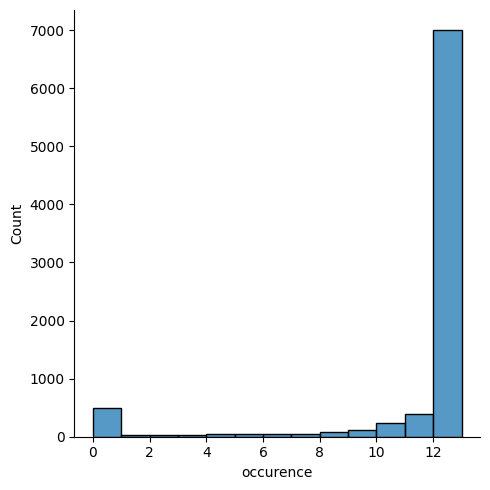

In [17]:
df_busco_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_augustus_gallus_v2"])

8621
8621


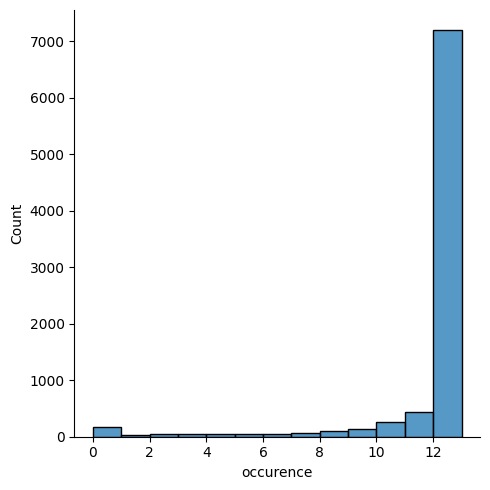

In [18]:
df_busco_metaeuk = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_metaeuk_gallus_v2"])

8321
8321


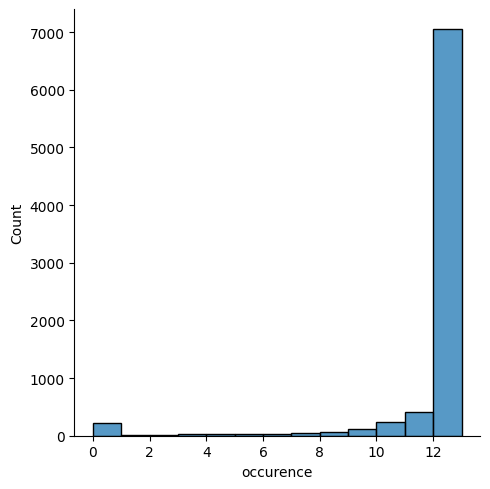

In [19]:
df_fdog_augustus = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_augustus_gallus_v2"])

8188
8188


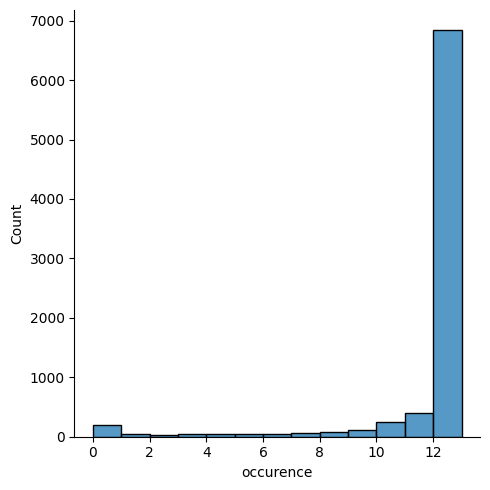

In [20]:
df_fdog_metaeuk = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_metaeuk_gallus_v2"])

In [21]:
def plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    self_assignment = 0
    for t in tools:
        test_set = set_dict[t]
        print(self_assignment)
        print(t)
        self_assignment = 0
        for i in test_set:
            occurence = 0
            #if len(i) == 1:
             #   self_assignment += 1
              #  continue
            for set_ref in list_of_sets_ref:
                if i in set_ref:
                    occurence += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    ax = sb.displot(data=df, x="occurence", hue='tool', binwidth=1, multiple="dodge")
    #ax = sb.displot(data=df, x="occurence", hue='tool', kind="kde", )
    sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_titles('Distribution of pairs supported by n protein-based tools')
    #Set x-axis label
    ax.set_xlabels('Pair supported by n protein-based tools')
    #Set y-axis label
    ax.set_ylabels('Number of pairs')
    ax.tight_layout()
    #plt.show()
    ax.savefig('comparison_with_other_qfo22_tools_pair_distribution.png', dpi=900, bbox_inches='tight')
    #print(self_assignment)
    return df

0
busco_metazoa_augustus_gallus_v2
0
busco_metazoa_metaeuk_gallus_v2
0
fdog_assembly_metazoa_augustus_gallus_v2
0
fdog_assembly_metazoa_metaeuk_gallus_v2


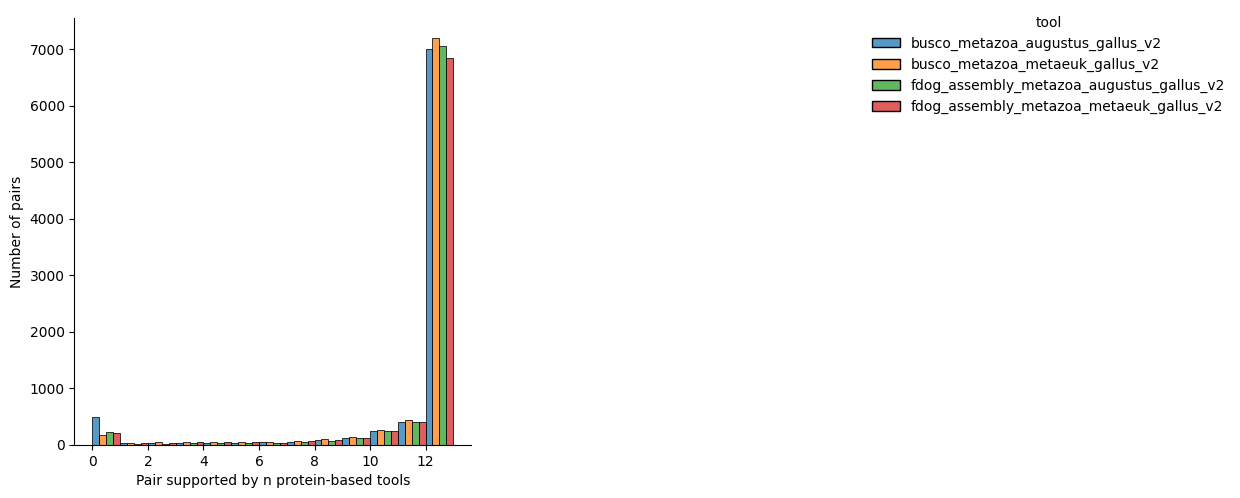

In [22]:
df_all = plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, dict_of_sets, tools)

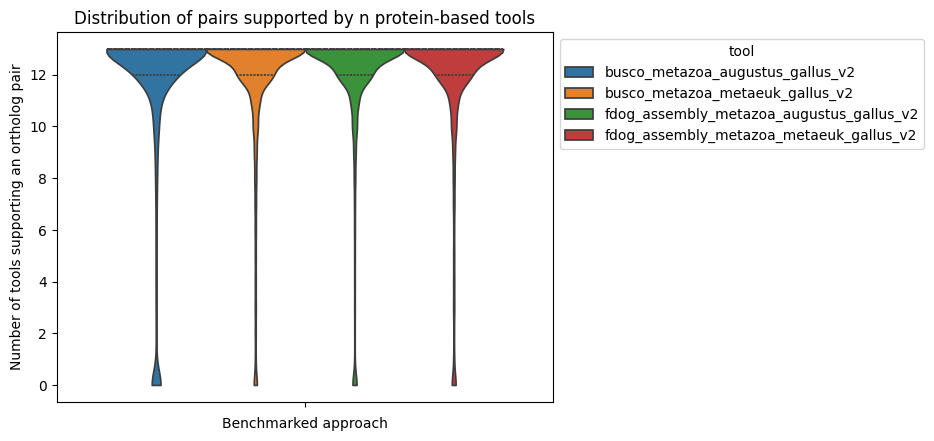

In [35]:
# as a violin plot
violin = sb.violinplot(data=df_all,y='occurence', hue='tool', cut=0, inner="quart")
sb.move_legend(violin, "upper left", bbox_to_anchor=(1, 1))
violin.set_title('Distribution of pairs supported by n protein-based tools')
#Set x-axis label
violin.set_xlabel('Benchmarked approach')
#Set y-axis label
violin.set_ylabel('Number of tools supporting an ortholog pair')
fig = violin.get_figure()
fig.savefig('comparison_with_other_qfo22_tools_pair_dictribution_violin.png', dpi=900, bbox_inches='tight')

Text(0, 0.5, 'Number of tools supporting an ortholog pair')

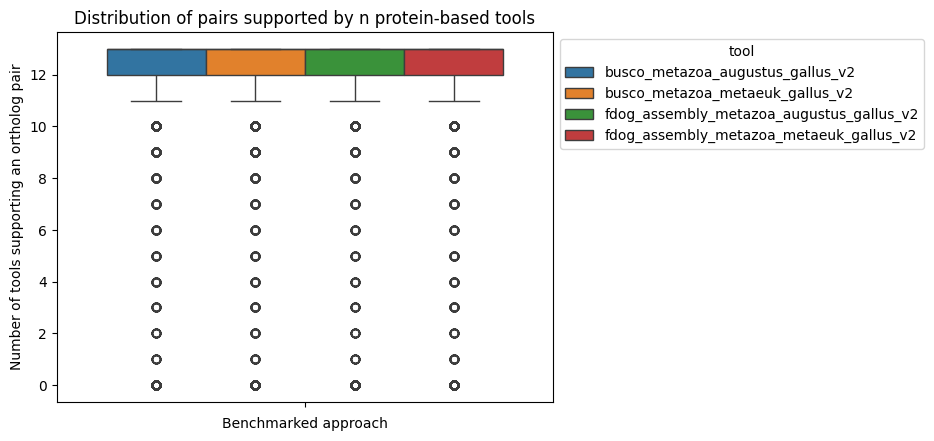

In [28]:
boxplot = sb.boxplot(data=df_all, y='occurence', hue='tool')
sb.move_legend(boxplot, "upper left", bbox_to_anchor=(1, 1))
boxplot.set_title('Distribution of pairs supported by n protein-based tools')
#Set x-axis label
boxplot.set_xlabel('Benchmarked approach')
#Set y-axis label
boxplot.set_ylabel('Number of tools supporting an ortholog pair')

In [56]:
#display(df_all)
df_filtered = df_all[df_all['occurence'] < 1].copy()
#display(df_filtered)
exclusive_pairs = df_filtered['pair'].copy()

In [57]:
def found_by_cutoff(df_occ, cutoff, tools):
    dict_sensitivity = {}
    occ_total = df_occ['tool'].value_counts()
    #display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] >= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    #display(occ)
    tool_name = []
    orthologs = []
    orthologs_supported_by_n_tools = []
    fraction = []
    for tool in tools:
        print(tool)
        tool_name.append(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
        orthologs.append(occ_total[tool])
        orthologs_supported_by_n_tools.append(occ[tool])
        fraction.append(occ[tool]/occ_total[tool])
    df_occ = pd.DataFrame({'Tool': tool_name, 'No_orthologs': orthologs, 'Orthologs_supported': orthologs_supported_by_n_tools, 'Fraction': fraction})
    return df_occ
    

In [58]:
found_by_cutoff(df_all, 2, tools)

busco_metazoa_augustus_gallus_v2
8567
8051
0.939768880588304
busco_metazoa_metaeuk_gallus_v2
8621
8419
0.9765688435216332
fdog_assembly_metazoa_augustus_gallus_v2
8321
8078
0.9707967792332652
fdog_assembly_metazoa_metaeuk_gallus_v2
8188
7949
0.9708109428431851


,Tool,No_orthologs,Orthologs_supported,Fraction
0,busco_metazoa_augustus_gallus_v2,8567,8051,0.939769
1,busco_metazoa_metaeuk_gallus_v2,8621,8419,0.976569
2,fdog_assembly_metazoa_augustus_gallus_v2,8321,8078,0.970797
3,fdog_assembly_metazoa_metaeuk_gallus_v2,8188,7949,0.970811


In [59]:
found_by_cutoff(df_all, 6, tools)

busco_metazoa_augustus_gallus_v2
8567
7917
0.9241274658573596
busco_metazoa_metaeuk_gallus_v2
8621
8242
0.9560375826470247
fdog_assembly_metazoa_augustus_gallus_v2
8321
7969
0.9576973921403678
fdog_assembly_metazoa_metaeuk_gallus_v2
8188
7779
0.9500488519785051


,Tool,No_orthologs,Orthologs_supported,Fraction
0,busco_metazoa_augustus_gallus_v2,8567,7917,0.924127
1,busco_metazoa_metaeuk_gallus_v2,8621,8242,0.956038
2,fdog_assembly_metazoa_augustus_gallus_v2,8321,7969,0.957697
3,fdog_assembly_metazoa_metaeuk_gallus_v2,8188,7779,0.950049


In [60]:
def plot_frequency_all_evaluation_protein_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    counter_t = 0
    print(tools)
    for t in tools:
        test_set = set_dict[t]
        for i in test_set:
            occurence = 0
            counter_list = 0
            for set_ref in list_of_sets_ref:
                if counter_list == counter_t:
                    counter_list += 1
                    continue
                if i in set_ref:
                    occurence += 1
                counter_list += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
        counter_t += 1
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    return df

In [61]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
found_by_cutoff(df_ref_tools, 6, tools_ref)
found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
8738
8645
0.9893568322270543
domainoid
8945
8788
0.982448295136948
ensamble
8168
7632
0.9343780607247796
hieranoid
8422
8370
0.9938256946093564
inparanoid
8487
8459
0.9967008365735831
metaphors
8979
8228
0.9163603964806771
oma_pairs
7973
7896
0.990342405618964
orthoffgc
8616
8478
0.983983286908078
orthofinder
9372
8858
0.9451557831839522
orthoinspector
9006
8867
0.9845658449922274
panther
8906
8462
0.9501459690096564
rsd
8606
8389
0.9747850336974204
sonicparanoid
9126
8860
0.9708525093140478
bbh
8738
8737
0.9998855573357748
domainoid
8945
8917
0.9968697596422582
ensamble
8168
7900
0.9671890303623898
hieranoid
8422
8414
0.9990501068629779
inparanoid
8487
8483
0.9995286909390833
metaphors
8979
8556
0.9528900768459739
oma_pairs
7973
7956
0.997867803837953
orthoffgc
8616
8602
0.9983751160631383
orthofinder
9372
9253
0.987

,Tool,No_orthologs,Orthologs_supported,Fraction
0,bbh,8738,8737,0.999886
1,domainoid,8945,8917,0.996870
2,ensamble,8168,7900,0.967189
3,hieranoid,8422,8414,0.999050
4,inparanoid,8487,8483,0.999529
5,metaphors,8979,8556,0.952890
6,oma_pairs,7973,7956,0.997868
7,orthoffgc,8616,8602,0.998375
8,orthofinder,9372,9253,0.987303
9,orthoinspector,9006,8998,0.999112


In [62]:
def found_by_less(df_occ, cutoff, tools):
    occ_total = df_occ['tool'].value_counts()
    display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] <= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    display(occ)
    for tool in tools:
        print(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
    return df_filtered

In [63]:
df_not_found = found_by_less(df_all, 0, tools)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

tool
busco_metazoa_metaeuk_gallus_v2             8621
busco_metazoa_augustus_gallus_v2            8567
fdog_assembly_metazoa_augustus_gallus_v2    8321
fdog_assembly_metazoa_metaeuk_gallus_v2     8188
Name: count, dtype: int64

tool
busco_metazoa_augustus_gallus_v2            492
fdog_assembly_metazoa_augustus_gallus_v2    222
fdog_assembly_metazoa_metaeuk_gallus_v2     201
busco_metazoa_metaeuk_gallus_v2             168
Name: count, dtype: int64

busco_metazoa_augustus_gallus_v2
8567
492
0.057429671997198554
busco_metazoa_metaeuk_gallus_v2
8621
168
0.01948729845725554
fdog_assembly_metazoa_augustus_gallus_v2
8321
222
0.026679485638745344
fdog_assembly_metazoa_metaeuk_gallus_v2
8188
201
0.024548119198827552


,pair,occurence,tool,gene1,gene2
11,Q90WY4_Q9UQ13,0,busco_metazoa_augustus_gallus_v2,Q90WY4,Q9UQ13
33,P0C6P6_O43462,0,busco_metazoa_augustus_gallus_v2,P0C6P6,O43462
66,P57088_Q9XWV6,0,busco_metazoa_augustus_gallus_v2,P57088,Q9XWV6
91,T1EQS1_Q9BUB7,0,busco_metazoa_augustus_gallus_v2,T1EQS1,Q9BUB7
94,Q9BKQ8_Q9UHR5,0,busco_metazoa_augustus_gallus_v2,Q9BKQ8,Q9UHR5
...,...,...,...,...,...
33460,Q9UQ13_Q1L8Y7-1,0,fdog_assembly_metazoa_metaeuk_gallus_v2,Q9UQ13,Q1L8Y7-1
33461,Q9UHV9_A0A1D5PUC0,0,fdog_assembly_metazoa_metaeuk_gallus_v2,Q9UHV9,A0A1D5PUC0
33487,O95071,0,fdog_assembly_metazoa_metaeuk_gallus_v2,O95071,None
33590,Q9Y2Q9,0,fdog_assembly_metazoa_metaeuk_gallus_v2,Q9Y2Q9,None


# Human Proteom benchmark

In [44]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools_human_proteom = ['fdog_assembly_human_proteom_augustus', 'fdog_assembly_human_proteom_metaeuk']
path = '../../results/qfo_input/human_proteom/'

In [45]:
list_of_sets_ref = []
dict_of_sets = {}
for i in tools_ref:
    #pairs_set = create_set_of_sets(path + i + '.tsv')
    pairs_set = create_set_of_sets(path + i + '_5t.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set

6027
10002
21850
7223
8366
10256
9445
6071
9651
7832
12511
6069
11938


In [46]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
3550


In [47]:
list_of_sets = []
for t in tools_human_proteom:
    print(t)
    #pairs_set = create_set_of_sets(path + t + '.tsv')
    pairs_set = create_set_of_sets(path + t + '_5t.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

fdog_assembly_human_proteom_augustus
7371
fdog_assembly_human_proteom_metaeuk
7742


In [48]:
for i in range(len(tools_human_proteom)):
    print(tools_human_proteom[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    not_found = intersection_all - list_of_sets[i] 
    print(intersection_size)
    print(intersection_size/len(intersection_all))

fdog_assembly_human_proteom_augustus
3094
0.8715492957746479
fdog_assembly_human_proteom_metaeuk
3215
0.9056338028169014


In [49]:
import pandas as pd
# Investigation of those cases
#print(not_found)
# I tested a few cases and recognized that some of those genes are in the overlap table 
#load overlap table to find out how many cases are really present in the table and 'just a cut-off' issues -> also find out the range of overlaps
fa_augustus_human_proteom = pd.read_csv('../overlap_tables/fdog_ass_human_proteom_augustus_overlap_gff_files_rat_nema.tsv', delimiter='\t')
df_reduced = fa_augustus_human_proteom[['GeneID','uniprotID']].copy()
geneids = df_reduced['GeneID'].tolist()
uniprot = df_reduced['uniprotID'].tolist()
print(len(geneids))
print(len(uniprot))
pairs_table = set()
for i in range(0,len(geneids)):
    pairs = frozenset([geneids[i], uniprot[i]])
    pairs_table.add(pairs)
print(len(pairs_table))
in_overlap_table = pairs_table.intersection(not_found)
# Genes found in overlap table but were kicked out due to overlap cutoff
print(len(in_overlap_table))
print(len(not_found))
not_found_no_overlap = not_found - in_overlap_table
print(not_found_no_overlap)

# wie viele davon sind von welcher Spezies?? (bis jetzt alle Fälle die ich raus gezogen haben von Ratte)
# Q6PEY1 -> huge lcr coverage 

67272
67272
41144
91
335
{frozenset({'B1WC88', 'Q8TCD1'}), frozenset({'Q5FVQ8', 'Q86UT6'}), frozenset({'A7RTQ2', 'Q9H841'}), frozenset({'P40112', 'P49720'}), frozenset({'A0A0G2JWJ1', 'Q9ULI4'}), frozenset({'P22466', 'P10683'}), frozenset({'P23347', 'P04920'}), frozenset({'P53678', 'P53677'}), frozenset({'P0CE46', 'Q8IWU4'}), frozenset({'Q99372', 'P15502'}), frozenset({'A7S6F5', 'Q13163'}), frozenset({'A7S6A8', 'Q8N5T2'}), frozenset({'Q9UEU0', 'A7S502'}), frozenset({'Q9Z244', 'P36959'}), frozenset({'Q9H0R1', 'A7S7Z0'}), frozenset({'P62070', 'A7SAS1'}), frozenset({'A7SI16', 'P04844'}), frozenset({'Q9Y605', 'Q5M820'}), frozenset({'Q9EQH5', 'P56545'}), frozenset({'O94805', 'P86173'}), frozenset({'D3ZWI9', 'Q16655'}), frozenset({'P54819', 'P29410'}), frozenset({'Q5XI51', 'Q8N4N8'}), frozenset({'O95139', 'D3ZZ21'}), frozenset({'Q15573', 'Q3B7U2'}), frozenset({'G3V6W6', 'P62333'}), frozenset({'Q13443', 'A0A8I5Y224'}), frozenset({'Q13163', 'Q62862'}), frozenset({'A7RKV5', 'O75817'}), frozenset

7371
7371


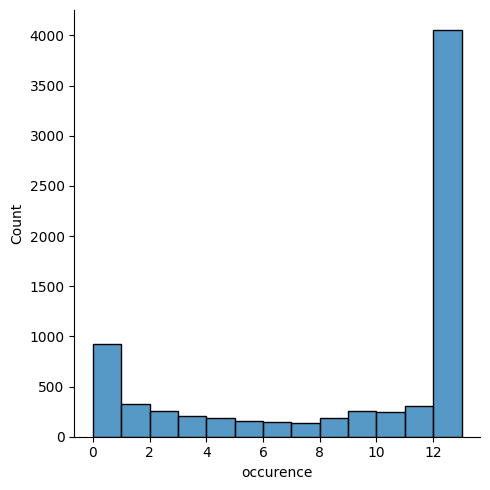

In [50]:
df_fdog_ass_human_proteom = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_human_proteom_augustus"])

In [52]:
df_all = plot_frequency_all_evaluation_protein_based(list_of_sets_ref, dict_of_sets, tools_human_proteom)

['fdog_assembly_human_proteom_augustus', 'fdog_assembly_human_proteom_metaeuk']


In [53]:
found_by_cutoff(df_all, 2, tools_human_proteom)

fdog_assembly_human_proteom_augustus
7371
6125
0.8309591642924976
fdog_assembly_human_proteom_metaeuk
7742
6679
0.8626969775251873


,Tool,No_orthologs,Orthologs_supported,Fraction
0,fdog_assembly_human_proteom_augustus,7371,6125,0.830959
1,fdog_assembly_human_proteom_metaeuk,7742,6679,0.862697


In [54]:
df_ass_occ = found_by_cutoff(df_all, 6, tools_human_proteom)

fdog_assembly_human_proteom_augustus
7371
5302
0.7193053859720526
fdog_assembly_human_proteom_metaeuk
7742
5697
0.7358563678636011


In [55]:
df_not_found = found_by_less(df_all, 0, tools_human_proteom)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

tool
fdog_assembly_human_proteom_metaeuk     7742
fdog_assembly_human_proteom_augustus    7371
Name: count, dtype: int64

tool
fdog_assembly_human_proteom_augustus    920
fdog_assembly_human_proteom_metaeuk     735
Name: count, dtype: int64

fdog_assembly_human_proteom_augustus
7371
920
0.12481345814679148
fdog_assembly_human_proteom_metaeuk
7742
735
0.0949367088607595


,pair,occurence,tool,gene1,gene2
4,Q9H8G1_A0A8I5ZTI4,0,fdog_assembly_human_proteom_augustus,Q9H8G1,A0A8I5ZTI4
6,A7RGM9_P14652,0,fdog_assembly_human_proteom_augustus,A7RGM9,P14652
8,Q14525_F1MAS0,0,fdog_assembly_human_proteom_augustus,Q14525,F1MAS0
27,A7S2G3_Q9H0U4,0,fdog_assembly_human_proteom_augustus,A7S2G3,Q9H0U4
44,A7SQ53_P02462,0,fdog_assembly_human_proteom_augustus,A7SQ53,P02462
...,...,...,...,...,...
15073,A7S4B6_Q08AN1,0,fdog_assembly_human_proteom_metaeuk,A7S4B6,Q08AN1
15077,A7S286_P19793,0,fdog_assembly_human_proteom_metaeuk,A7S286,P19793
15081,A7SNK9_P62070,0,fdog_assembly_human_proteom_metaeuk,A7SNK9,P62070
15083,P49862_A7SGX2,0,fdog_assembly_human_proteom_metaeuk,P49862,A7SGX2


In [56]:
# How do the reference tools overlap with each other?
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))

bbh
3550
3561
0.9969109800617804
domainoid
3550
3550
1.0
ensamble
3550
4006
0.8861707438841737
hieranoid
3550
3593
0.9880322849986084
inparanoid
3550
3554
0.9988745075970737
metaphors
3550
3845
0.9232769830949284
oma_pairs
3550
3621
0.9803921568627451
orthoffgc
3550
3647
0.9734027968193035
orthofinder
3550
3560
0.9971910112359551
orthoinspector
3550
3559
0.9974711997752178
panther
3550
3645
0.9739368998628258
rsd
3550
3697
0.9602380308358128
sonicparanoid
3550
3550
1.0


In [57]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
found_by_cutoff(df_ref_tools, 6, tools_ref)
df_occ = found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
6027
5816
0.9649908743985399
domainoid
10002
6837
0.6835632873425315
ensamble
21850
5707
0.2611899313501144
hieranoid
7223
6196
0.857815312197148
inparanoid
8366
6549
0.7828113793927803
metaphors
10256
5978
0.5828783151326054
oma_pairs
9445
6117
0.6476442562202224
orthoffgc
6071
5569
0.9173118102454291
orthofinder
9651
6721
0.6964045176665631
orthoinspector
7832
6818
0.8705311542390194
panther
12511
6420
0.5131484293821437
rsd
6069
5430
0.8947108255066732
sonicparanoid
11938
6832
0.5722901658569275
bbh
6027
6013
0.9976771196283392
domainoid
10002
8303
0.830133973205359
ensamble
21850
7705
0.3526315789473684
hieranoid
7223
6642
0.9195625086529143
inparanoid
8366
7398
0.8842935692087018
metaphors
10256
7457
0.7270865834633385
oma_pairs
9445
7234
0.7659078877713076
orthoffgc
6071
5888
0.96985669576676
orthofinder
9651
84

,Tool,No_orthologs,Orthologs_supported,Fraction
0,fdog_assembly_human_proteom_augustus,7371,5302,0.719305
1,fdog_assembly_human_proteom_metaeuk,7742,5697,0.735856
0,bbh,6027,6013,0.997677
1,domainoid,10002,8303,0.830134
2,ensamble,21850,7705,0.352632
3,hieranoid,7223,6642,0.919563
4,inparanoid,8366,7398,0.884294
5,metaphors,10256,7457,0.727087
6,oma_pairs,9445,7234,0.765908
7,orthoffgc,6071,5888,0.969857


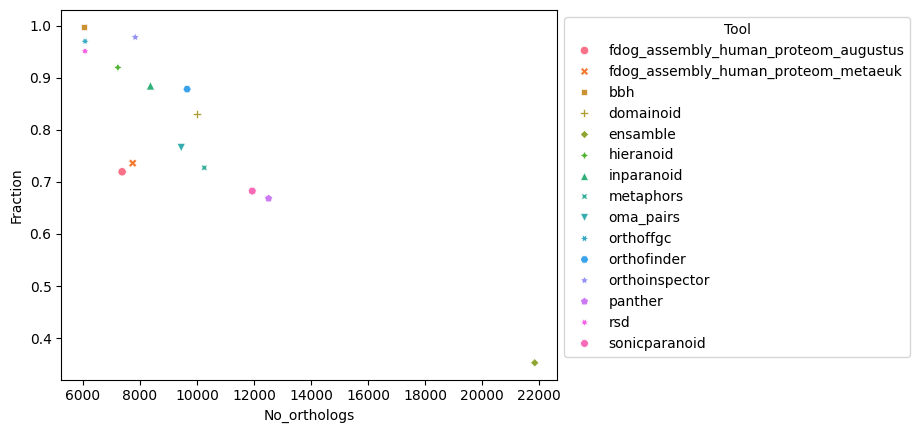

In [58]:
df_all_occ = pd.concat([df_ass_occ, df_occ])
display(df_all_occ)
plot = sb.scatterplot(data= df_all_occ, x='No_orthologs', y='Fraction', hue='Tool', style='Tool')
sb.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))